<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">20221 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Indicar aquí el nombre y apellidos
</div>

# PEC 1: Preparación de datos

En esta práctica revisaremos y aplicaremos los conocimientos aprendidos en el **módulo 1**, donde nos centraremos en como aplicar diferentes técnicas para la carga y preparación de datos:

1. Carga de un conjunto de datos
2. Análisis de los datos
    - Análisis estadístico básico
    - Análisis exploratorio de los datos
3. Reducción de la dimensionalidad
4. Entrenamiento y test

<u>Consideraciones generales</u>: 

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de la carga de datos cómo se indica posteriormente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.

## 0. Carga de librerías

En la siguiente celda se deben cargar todas las librerías necesarias para la ejecución de la actividad. Se debe indicar y justificar el uso de librerías adicionales.

In [1]:
# Librerías básicas
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

## 1. Carga del conjunto de datos (1 punto)

En primer lugar, deberéis cargar el conjunto de datos [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). 

Este conjunto de datos se puede descargar de Internet o puede ser cargado directamente de la librería `scikit-learn`, que incorpora un conjunto de [_datasets_](https://scikit-learn.org/stable/datasets.html) muy conocidos y empleados para minería de datos y aprendizaje automático.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Cargad el conjunto de datos **Diabetes** y mostrad:
- El número y nombre de los atributos
- El número de filas del conjunto de datos
- Verificad si hay _missing values_ y, en caso afirmativo, indicad en qué columnas se encuentran

In [7]:
#cargamos el dataset con los datos Diabetes con pandas y lo guardamos en el objeto df
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')

In [13]:
# con DataFrame.info() podemos ver los atributos y la cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


En este caso, podemos ver que hay 442 observaciones (o filas). Es decir, que hay 442 filas en el conjunto de datos y un total de 11 columnas (o atributos). Info también nos muestra los diferentes nombres de las características de los datos y el data type.

El dataframe anterior está formado por el conjunto de atributos siguiente:


        - Age. Edad en años
        - Sex. Sexo
        - BMI. Índice de Masa Corporal
        - BP. Media de la presión sanguinea
        - S1. Colesterol total
        - S2. Lipoproteínas de baja densidad
        - S3. Lipoproteínas de alta densidad
        - S4. Colesterl total / HDL
        - S5. Nivel de triglicéridos
        - S6. Nivel de azúcar en sangre

Las descripciones de estos atributos se han relaizado gracias a la información de [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). 


También podemos ver como hay 442 valores no nulos en todos los atributos, lo que significa que no hay missing values. Para comprobarlo, podemos utilizar funciones específicas de Pandas que nos ofrecerán esta información:


In [16]:
#el número de missing values en cada atributo:
df.isna().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Realizad un análisis estadístico básico, siguiendo los criterios descritos a continución:
- En el caso de las **variables categóricas**, realizad las siguientes operaciones para cada una de ellas:
    - Calculad la frecuencia
    - Haced un gráfico de barras
- En el caso de las **variables numéricas**, realizad las siguientes operaciones para cada una de ellas:
    - Calculad estadísticos descriptivos básicos, como la media, mediana, desviación estándard, etc.
    - Haced un histograma de valores
    
**Notas**:
- Podéis utilizar la librería `pandas` y sus funciones `describe` y  `value_counts`, así como las funciones  `bar` e `hist` de la librería `matplotlib`.

In [17]:
df.head() 

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [45]:
set(df.S4)

{2.0,
 2.15,
 2.19,
 2.62,
 2.67,
 2.7,
 2.71,
 2.77,
 2.79,
 3.0,
 3.05,
 3.15,
 3.37,
 3.4,
 3.49,
 3.65,
 3.68,
 3.73,
 3.77,
 3.8,
 3.85,
 3.88,
 4.0,
 4.02,
 4.04,
 4.08,
 4.09,
 4.15,
 4.16,
 4.21,
 4.31,
 4.42,
 4.5,
 4.55,
 4.61,
 4.63,
 4.64,
 4.7,
 4.71,
 4.76,
 4.79,
 4.8,
 4.84,
 4.96,
 5.0,
 5.05,
 5.1,
 5.13,
 5.43,
 5.45,
 5.5,
 5.59,
 5.63,
 6.0,
 6.02,
 6.24,
 6.26,
 6.37,
 6.42,
 6.56,
 7.0,
 7.6,
 7.9,
 8.0,
 8.28,
 9.09}

Vemos que de todas las variables, la única que es categórica es 'SEX'.

In [21]:
# Convertimos la variable SEX en categórica
df['SEX'] = df.SEX.astype('category')

<AxesSubplot:>

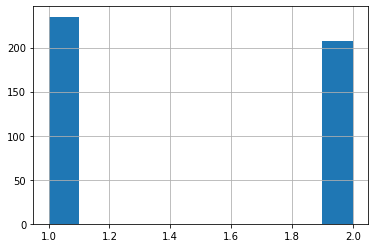

In [22]:
# Gráfico de frecuencias de la variable SEX
df['SEX'].hist()

In [33]:
# Frecuencias de los valores de Sex
print('Frecuencia de SEX = 1:',
df['SEX'][df.SEX == 1].count()/len(df))

print('Frecuencia de SEX = 0:',
df['SEX'][df.SEX == 2].count()/len(df))

Frecuencia de SEX = 1: 0.5316742081447964
Frecuencia de SEX = 0: 0.4683257918552036


In [32]:
df['SEX'][df.SEX == 2]

0      2
2      2
6      2
7      2
8      2
      ..
428    2
431    2
437    2
438    2
439    2
Name: SEX, Length: 207, dtype: category
Categories (2, int64): [1, 2]

In [35]:
# generamos un nuevo dataframe con las variables cuantitativas

cuant = df.drop(columns='SEX')
cuant.head()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [37]:
# mostramos los estadísticos descriptivos
cuant.describe().iloc[1:]

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [39]:
cuant.median()

AGE     50.00000
BMI     25.70000
BP      93.00000
S1     186.00000
S2     113.00000
S3      48.00000
S4       4.00000
S5       4.62005
S6      91.00000
Y      140.50000
dtype: float64

In [43]:
cuant.agg(['mean', 'median', 'std', 'var'])

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
median,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
var,171.846610,19.519798,191.304401,1197.717241,924.955494,167.293585,1.665261,0.272892,132.165712,5943.331348


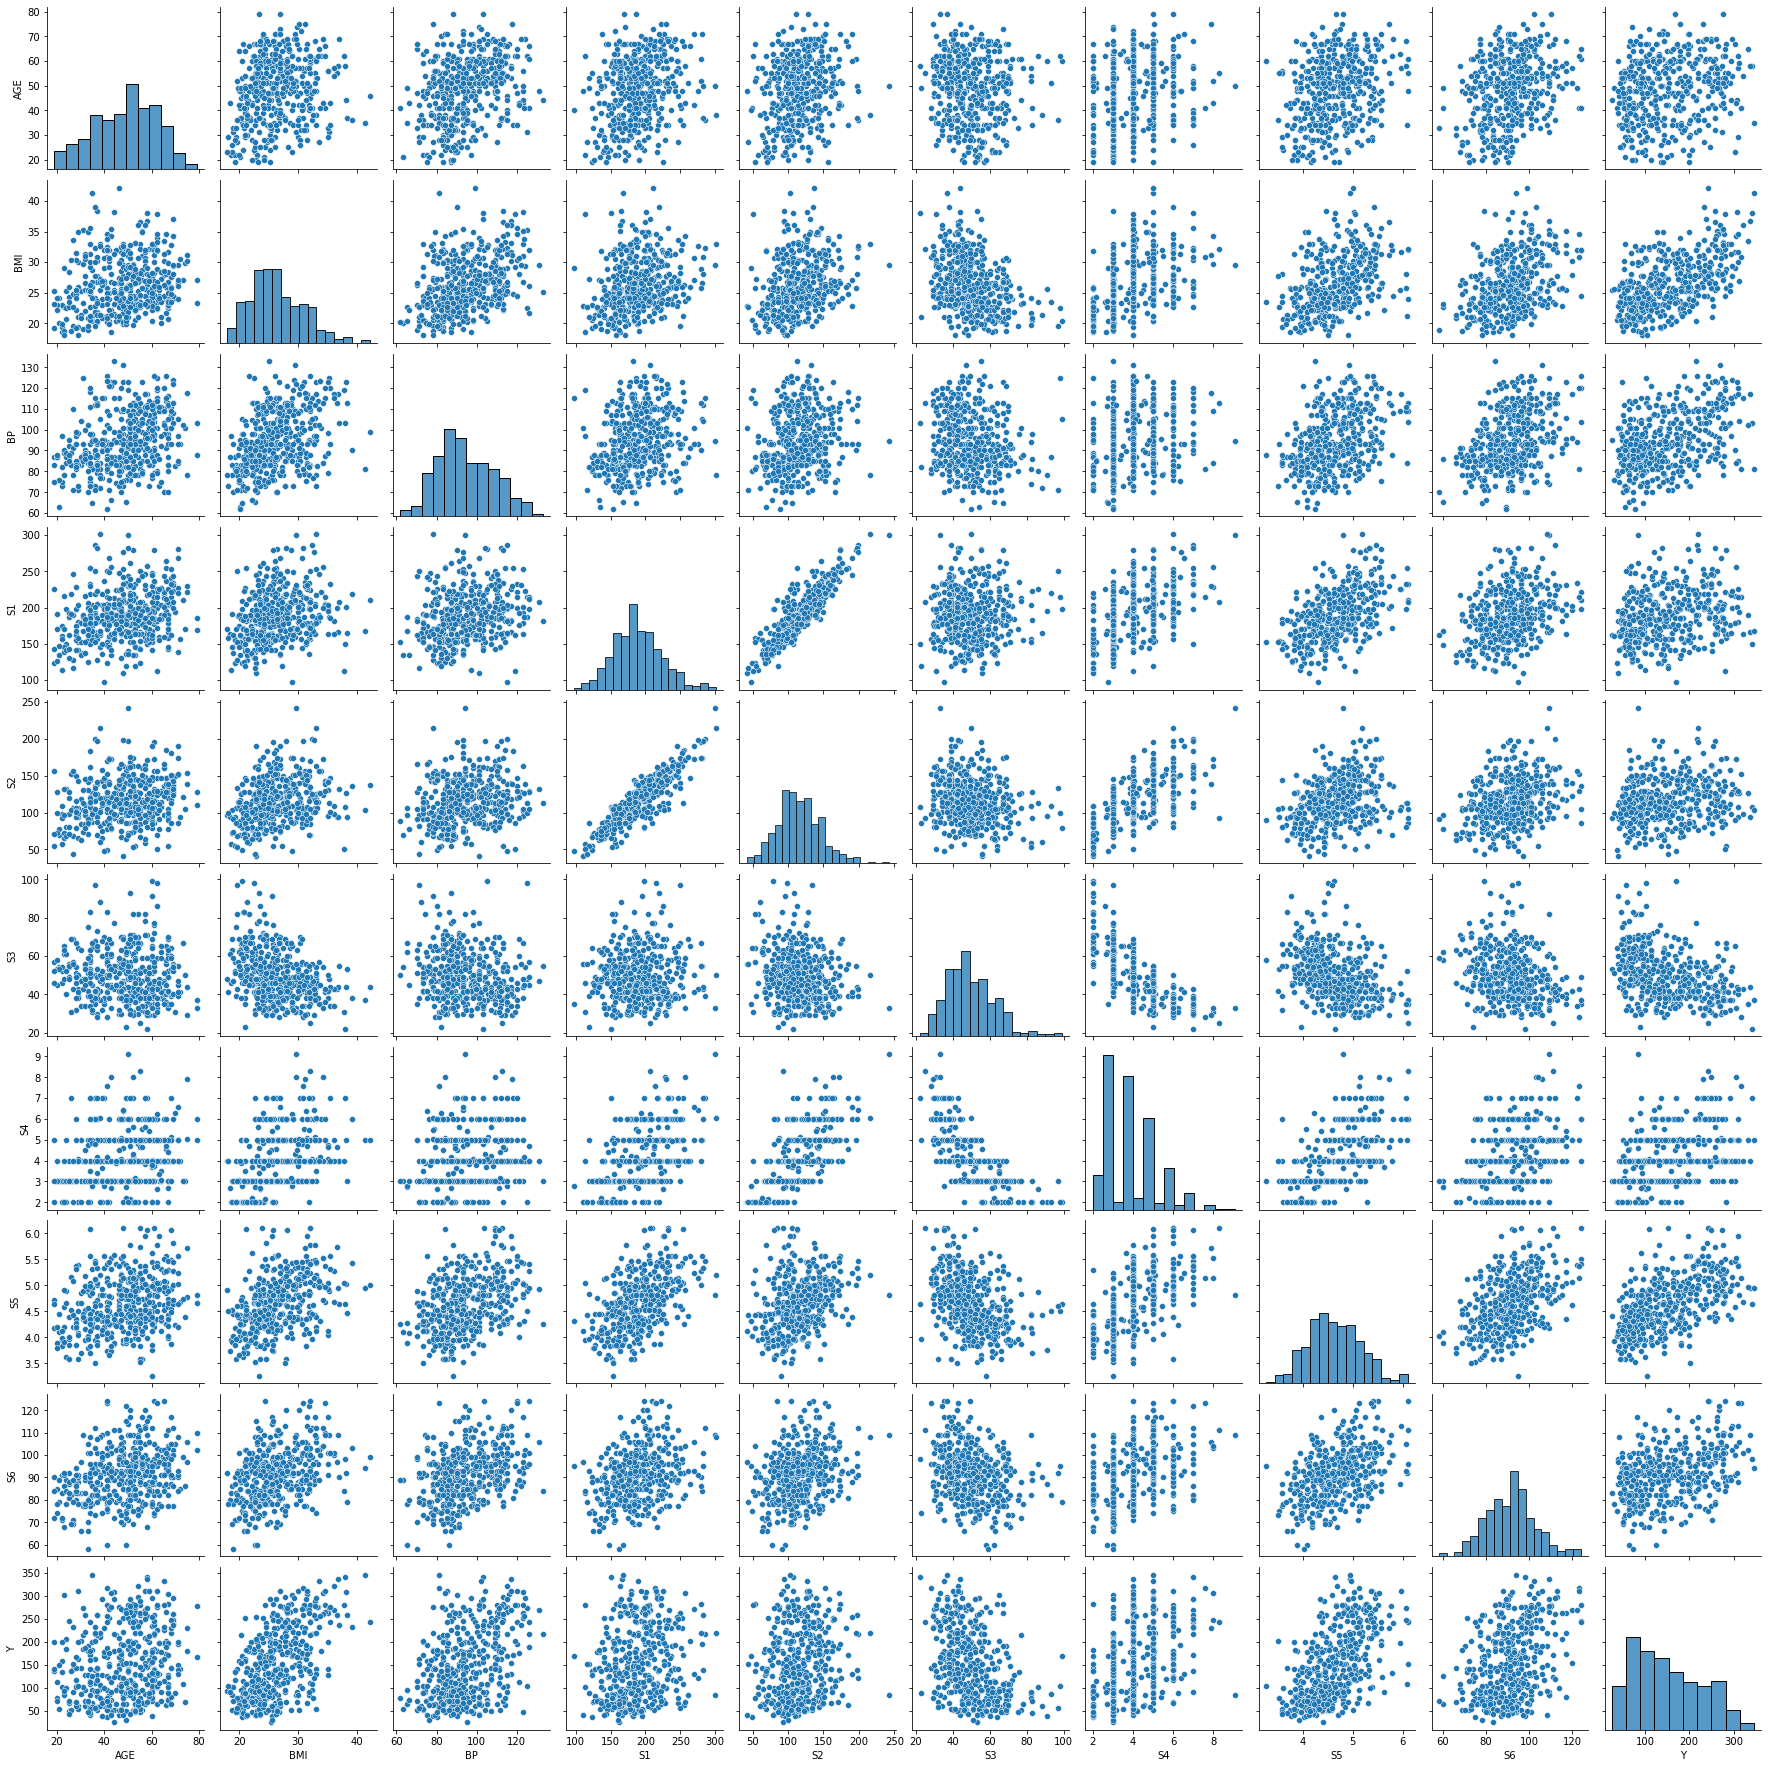

In [44]:
import seaborn as sns
sns.pairplot(cuant)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Comentad los resultados obtenidos.

Plotear estos valores cuantitativos nos sirve para ver las relaciones que existen entre las diferentes variables y la variable Y, la que queremos predecir. Todas parecen seguir una relación lineal. Excepto con la variable de BMI, que parece que la relación exponencial. 

En la variable S4, pese a ser una variable cuantitativa, vemos que faltan muchos valores intermendios y parece que se han redondeado la mayoría de valores, pero no todos. De manera que es prácticamente una variable ordinal con algunos valores intermedios. La distribución de esta variable tampoco sigue una distribución normal, más bien sigue una gamma donde los valores más frecuentes son los más cercanos a 0 y la frecuencia de los valores cae a medida que los valores son más altos. 

In [ ]:
# Convertimos la variable SEX en categórica
df['SEX'] = df.SEX.astype('category')

## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de los atributos con la variable respuesta, mediante gráficos y analizando las correlaciones de los atributos numéricos.

In [13]:
response = "target"
cat_feats = "sex"
num_feats = ['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
print('Respuesta (target)    :', response)
print("Atributos categóricos :", cat_feats)
print("Atributos numéricos   :", num_feats)

Respuesta (target)  : target
Atributo categórico : 
Atributos numéricos : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Calculad y mostrad la correlación entre todos los atributos numéricos y la variable de respuesta (o variable objetivo).

Previamente vamos a normalizar los datos, de manera que los datos estén en el mismo rango. Algunos algoritmos son más sensibles a los valores más altos. De manera que el algoritmo podría estar sesgado a estos atributos y darles más peso del que realmente tienen en los datos.

In [49]:
# para normalizar los datos, podemos crear una nueva función

def norm_df(df: pd.DataFrame()):
    brain_norm = (df - df.mean())/df.std()
    return brain_norm

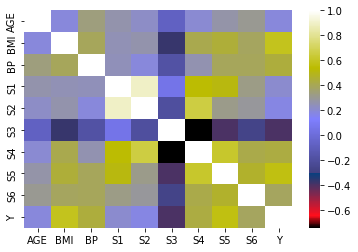

In [54]:
cuantnor = norm_df(cuant)
diab_corr = cuantnor.corr()


sns.heatmap(diab_corr, cmap="gist_stern")
plt.show()

La matriz de correlación muestra que los atributos S4, S5 y S6 tienen una correlación muy alta entre ellos. De manera que estas variables proporcionan información redundante. Se podría eliminar algunos de estos atributos, o podríamos emplear una PCA más adelante para extraer los componentes principales.

Por otro lado, vemos que la variable S3 tiene una correalción muy baja con el resto. Aún así, tiene una cierta capacidad de predicción de la variable Y. Por esta razón, la seguiré manteniendo en el dataset y no la eliminaré.



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Representad gráficamente las relaciones entre todas las parejas de las variables numéricas (sin incluir la variable respuesta) del conjunto de datos. 

La finalidad de este ejercicio es poder observar y analizar las correlaciones de manera gráfica entre los pares de variables.

**Notas**:
- Podéis usar la función `pairplot` de la librería `seaborn`.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Identificad los 2 atributos que tienen una **correlación más fuerte** con la variable de respuesta, y los 2 con una **correlación más débil** (considerando el coeficiente de correlación mayor o menor en valor absoluto). 

Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 4 atributos identificados, un _scatter plot_ con el atributo en el eje X y la respuesta en el eje Y. Además, en cada gráfico añadid la representación de una regresión lineal que aproxime los puntos.

**Notas**: 
- Podéis usar la función `regplot` de la librería `seaborn`.

In [68]:
# mostramos las dos variables con una correlación más débil con la variable Y

abs(diab_corr['Y']).sort_values().head(2)

S2     0.174054
AGE    0.187889
Name: Y, dtype: float64

Text(0.5, 1.0, 'AGE')

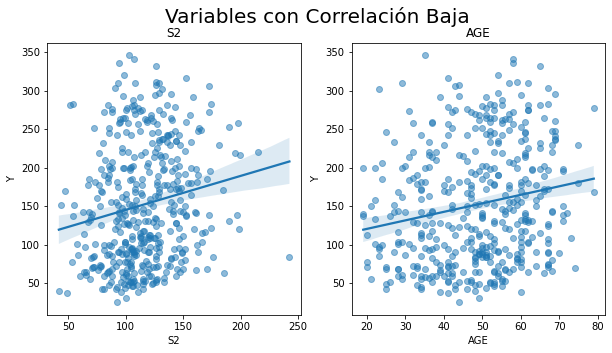

In [95]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Variables con Correlación Baja', fontsize=20)

# correlación entre BMI e Y
sns.regplot(data=df, x='S2', y='Y', ax=axs[0],
            scatter_kws={'alpha':0.5}).set_title('S2')
# correlación entre S5 e Y
sns.regplot(data=df, x='AGE', y='Y', ax=axs[1],
            scatter_kws={'alpha':0.5}).set_title('AGE')

In [67]:
# mostramos las dos variables con una correlación más fuerte con la variable Y
abs(diab_corr['Y']).sort_values(ascending=False).iloc[1:3]

BMI    0.586450
S5     0.565883
Name: Y, dtype: float64

Text(0.5, 1.0, 'S5')

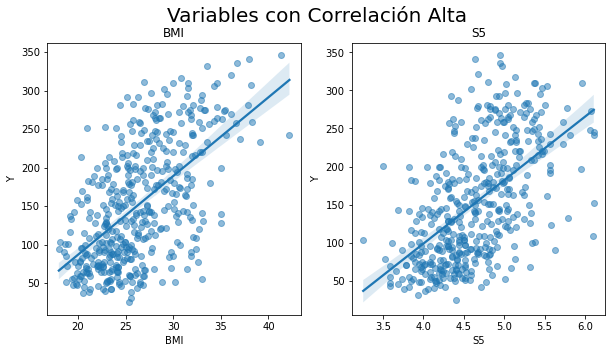

In [94]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
fig.suptitle('Variables con Correlación Alta', fontsize=20)
# correlación entre BMI e Y
sns.regplot(data=df, x='BMI', y='Y', ax=axs[0],
            scatter_kws={'alpha':0.5}).set_title('BMI')
# correlación entre S5 e Y
sns.regplot(data=df, x='S5', y='Y', ax=axs[1],
            scatter_kws={'alpha':0.5}).set_title('S5')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.

Se puede ver fácilmente como en las variables con correlación baja hay una nube de puntos y no se aprecia una relación clara. Además, la regresión lineal es prácticamente plana y la inclinación (slope) es casi paralela con el eje de las X. 

Por otro lado, en el caso de las variables con correlación alta, si se observa una relación entre las variables. A medida que aumentan los valores de BMI o S5, también aumentan los de la variable Y y la correlación dibujada por la correlación lineal muestra que a medida que aumentan los valores de las variables predictoras, también aumentan los valores de la variable objetivo (Target).

# 3. Reducción de la dimensionalidad (3 puntos)

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones, pero que contengan la máxima información posible presente en los atributos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Relizad las siguientes acciones:
- Aplicad el método de reducción de la dimensionalidad **Principal Component Analysis** (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.

- Generad un **gráfico** con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes X e Y, el valor de la respuesta (_target_) usando la escala de colores. El objetivo es visualizar la variación del atributo objetivo en función de los valores de las componentes principales generadas.

**Nota**: 
- Vigilad de no incluir la variable objetivo en la reducción de dimensionalidad, dado que queremos poder explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.
- No es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de `scikit-learn`.
- Podéis usar el _scatter plot_ de `matplotlib` con el parámetro `c`, que indica el color de los puntos, igual a la variable objetivo para generar el gráfico.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Relizad las siguientes operaciones:
- Repetid la reducción de dimensionalidad, pero en este caso usando **TSNE**. Podéis encontrar más información sobre este algoritmo en el link: https://distill.pub/2016/misread-tsne/
- Igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes X e Y, el valor de la respuesta (_target_) usando una escala de colores.

**Nota**:
- No es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de `scikit-learn`.
- A parte de especificar el número de componentes, probad a usar los parámetros `learning_rate` y `perplexity`.
- Podéis usar el _scatter plot_ de `matplotlib` con el parámetro `c`, que indica el color de los puntos, igual a la variable objetivo para generar el gráfico.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Observando los dos gráficos, responded a las siguinetes preguntas:
- ¿Creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación del atributo objetivo y visualizarlo de forma adecuada? 
- ¿Si utilizásemos las 2 nuevas variables para predecir el valor objetivo, con cuál de los dos métodos de reducción de dimensionalidad creéis que obtendríamos los mejores resultados? ¿Por qué obtenemos resultados tan diferentes con los dos métodos?

# 4 Entrenamiento y métricas (3 puntos)

## 4.a Regresión

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el **Random Forest** para regresión, para predecir el valor objetivo (_target_) y evaluar la precisión obtenida con el modelo.

Para eso usaremos el conjunto de datos original con todos los atributos menos la variable dependiente (target).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Usando el conjunto de datos original:
- Definid un modelo Random Forest (fijando `n_estimators=10` para mantener el modelo simple y `random_state=seed`).
- Aplicad validación cruzada con el modelo definido y el dataset de train (con `cv=5` ya es suficiente).
- Como métrica para cuantificar el error del modelo, utilizad tanto MAE (la media del error absoluto), MSE (error cuadrático medio) y MAPE (porcentaje de error absoluto medio), separadamente.
- Calculad la media y la desviación estándard del error obtenido en cada caso.

**Notas**:
- Para entrenar un modelo random forest podéis usar `RandomForestRegressor` de `sklearn`.
- Para aplicar validación cruzada podéis usar `cross_val_score` de `sklearn`, y modificar su parámetro `scoring` si fuese necesario.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

¿A qué se deben las diferencias numéricas entre las distintas métricas?

¿Qué muestras y errores crees que pueden influir más o menos en el incremento/decremento de las distintas métricas?

## 4.b Clasificación

Para este apartado se usará el conjunto de datos original pero como target (y) la variable "sex" (binaria, con valores 0 y 1), transformando el problema de regresión a clasificación.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

Genera el conjunto de variables independientes _X_ con los datos originales pero sin la variable _target_ ni _sex_ (será la nueva variable dependiente).

Genera la variable dependiente _y_ como un array de tipo _int_ que contenga el sexo asociado a cada fila para ser predicho.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio</strong>
</div>

- Definid un modelo Random Forest (fijando `n_estimators=10` para mantener el modelo simple y `random_state=seed`).
- Aplicad validación cruzada con el modelo definido y el dataset de train (con `cv=5` ya es suficiente).
- Como métrica para cuantificar el error del modelo, utilizad tanto accuracy como roc_auc.
- Calculad la media y la desviación estándard de las métricas obtenidas en cada caso.

**Notas**:
- Para entrenar un modelo random forest podéis usar `RandomForestClassifier` de `sklearn`.
- Para aplicar validación cruzada podéis usar `cross_val_score` de `sklearn`, y modificar su parámetro `scoring` si fuese necesario.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis</strong>
</div>

Si los valores de la columna _sex_ estuviesen desbalanceados con un 99% de ceros y un 1% de unos.

Para las dos métricas anteriores, ¿qué score obtendríamos con un modelo que siempre indicase 0?